#DJIA 30 Stock Time Series dataset
The script used to acquire all of the following data can be found in this GitHub repository. This repository also contains the modeling codes and will be updated continually, so welcome starring or watching!

Stock market data can be interesting to analyze and as a further incentive, strong predictive models can have large financial payoff. The amount of financial data on the web is seemingly endless. A large and well structured dataset on a wide array of companies can be hard to come by. Here provided a dataset with historical stock prices (last 12 years) for 29 of 30 DJIA companies (excluding 'V' because it does not have the whole 12 years data).

      ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 'GE',

      'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE',

      'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'GOOGL', 'AMZN', 'AABA']

####Content
The data is presented in a couple of formats to suit different individual's needs or computational limitations.
I have included files containing 13 years of stock data (in the all_stocks_2006-01-01_to_2018-01-01.csv and corresponding folder) and
a smaller version of the dataset (all_stocks_2017-01-01_to_2018-01-01.csv) with only the past year's stock data for those wishing to use something more manageable in size.

The folder individual_stocks_2006-01-01_to_2018-01-01 contains files of data for individual stocks, labelled by their stock ticker name.
The all_stocks_2006-01-01_to_2018-01-01.csv and all_stocks_2017-01-01_to_2018-01-01.csv contain this same data, presented in merged .csv files.
Depending on the intended use (graphing, modelling etc.) the user may prefer one of these given formats.

All the files have the following columns:
Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

##Question 1
####Import the libraries and extract the dataset from zipped file.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,BatchNormalization,Dropout

from tensorflow.keras.activations import sigmoid,relu,linear,tanh

from tensorflow.keras.losses import MeanAbsoluteError,MeanSquaredError
from tensorflow.keras.optimizers import Adam,RMSprop

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

##Question 2
####Import the dataset - 'IBM_2006-01-01_to_2018-01-01.csv'

In [2]:
root_folder = 'C:/Users/nswet/Documents/IK/Deeplearning_CV/DJIA_30_Stock_Time_Series/DJIA_30_Stock_Time_Series/'
file = 'IBM_2006-01-01_to_2018-01-01.csv'

file_path = root_folder + file

##Question 3
####Perform EDA on the datsaet to understand the data.

In [3]:
data_df = pd.read_csv(file_path,index_col='Date',parse_dates=['Date'])
data_df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
data_df.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [5]:
data_df[data_df["Open"].isnull()==True]

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-07-31,NaN,144.93,NaN,144.67,4355718,IBM


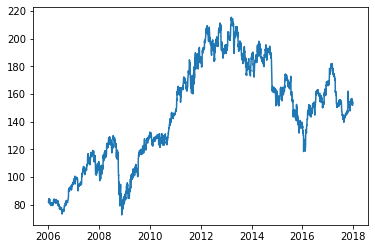

In [6]:
plt.plot(data_df["Open"])
plt.show()

In [7]:
data_df['2016']

C:\Users\nswet\AppData\Local\Temp\ipykernel_17392\2915824181.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_df['2016']


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2016-01-04,135.60,135.97,134.24,135.95,5208900,IBM
2016-01-05,136.76,136.89,134.85,135.85,3924793,IBM
2016-01-06,134.38,135.58,133.62,135.17,4310939,IBM
2016-01-07,133.70,135.02,132.43,132.86,7025760,IBM
2016-01-08,133.18,133.82,131.32,131.63,4762706,IBM
...,...,...,...,...,...,...
2016-12-23,167.00,167.49,166.45,166.71,1701228,IBM
2016-12-27,166.98,167.98,166.85,167.14,1397455,IBM
2016-12-28,167.29,167.74,166.00,166.19,1757500,IBM


## Treat missng values using forward fill

In [8]:
data_df["Forward_Fill_Open"] = data_df["Open"].ffill()

In [9]:
data_df["Forward_Fill_Open"].isnull().sum()

0

In [10]:
data_df["Forward_Fill_Low"] = data_df["Low"].ffill()

In [11]:
data_df.head()

,Open,High,Low,Close,Volume,Name,Forward_Fill_Open,Forward_Fill_Low
Date,,,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM,82.45,80.81
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM,82.20,81.33
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM,81.40,81.00
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM,83.95,83.41
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM,84.10,83.38


In [12]:
minmax = MinMaxScaler()
data_df_new = data_df["Forward_Fill_Open"]

data_scaled = minmax.fit_transform(data_df_new.values.reshape(-1,1))

##Question 4
####Extract the information to train the model from the dataset.

In [13]:
def create_dataset(data,step_back):
    
    X = []
    y = []
    
    for i in range(len(data)-step_back):
        
        subset = data[i:i+step_back,:]
        X.append(subset)
        y.append(data[i+step_back])
    return np.array(X),np.array(y)

temp_arr = np.array([[1,2,3,4,5,6,7,8,9,10],[11,22,33,44,55,66,77,88,99,100]])
temp_arr = temp_arr.T
dummy_df = pd.DataFrame(temp_arr,columns=["A","B"])
dummy_df.head()
x,y = create_dataset(dummy_df,5)

In [14]:
## train test split

train_size = int(len(data_scaled)*0.70)
test_size = int(len(data_scaled) - train_size)

In [15]:
print("Train data size",train_size)
print("Test data size",test_size)
print("Original Scaled data size",len(data_scaled))

Train data size 2114
Test data size 906
Original Scaled data size 3020


In [16]:
train_data = data_scaled[0:train_size,:]

test_data = data_scaled[train_size:,:]

In [17]:
print("Train data size",len(train_data))
print("Test data size",len(test_data))

Train data size 2114
Test data size 906


In [18]:
#Solution 5(your code here)
step_back =10
X_train, y_train = create_dataset(train_data,10)

X_test, y_test = create_dataset(test_data,10)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [20]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=60,input_shape=(10, 1)))

lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60)                14880     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 14941 (58.36 KB)
Trainable params: 14941 (58.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
lstm_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
2104/2104 - 7s - loss: 0.0021 - 7s/epoch - 3ms/step
Epoch 2/20
2104/2104 - 6s - loss: 6.6665e-04 - 6s/epoch - 3ms/step
Epoch 3/20
2104/2104 - 7s - loss: 4.9405e-04 - 7s/epoch - 3ms/step
Epoch 4/20
2104/2104 - 6s - loss: 3.3685e-04 - 6s/epoch - 3ms/step
Epoch 5/20
2104/2104 - 6s - loss: 3.0783e-04 - 6s/epoch - 3ms/step
Epoch 6/20
2104/2104 - 6s - loss: 2.6707e-04 - 6s/epoch - 3ms/step
Epoch 7/20
2104/2104 - 6s - loss: 2.6192e-04 - 6s/epoch - 3ms/step
Epoch 8/20
2104/2104 - 6s - loss: 2.7007e-04 - 6s/epoch - 3ms/step
Epoch 9/20
2104/2104 - 6s - loss: 2.4730e-04 - 6s/epoch - 3ms/step
Epoch 10/20
2104/2104 - 6s - loss: 2.4658e-04 - 6s/epoch - 3ms/step
Epoch 11/20
2104/2104 - 6s - loss: 2.3805e-04 - 6s/epoch - 3ms/step
Epoch 12/20
2104/2104 - 6s - loss: 2.3735e-04 - 6s/epoch - 3ms/step
Epoch 13/20
2104/2104 - 6s - loss: 2.3175e-04 - 6s/epoch - 3ms/step
Epoch 14/20
2104/2104 - 6s - loss: 2.2943e-04 - 6s/epoch - 3ms/step
Epoch 15/20
2104/2104 - 6s - loss: 2.2690e-04 - 6s/epoch - 3m

In [23]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

trainPredict = lstm_model.predict(X_train)
testPredict = lstm_model.predict(X_test)
# invert predictions
trainPredict_inv = minmax.inverse_transform(trainPredict)
trainY = minmax.inverse_transform(y_train)

# invert predictions
testPredict_inv = minmax.inverse_transform(testPredict)
testY = minmax.inverse_transform(y_test)

# calculate root mean squared error 
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

# calculate root mean squared error 
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

28/28 [==============================] - 0s 2ms/step
Train Score: 1.82 RMSE
Test Score: 1.84 RMSE


In [27]:
print("Y_train_pred length",len(trainPredict_inv))
print("Y_test_pred length",len(testPredict_inv))

Y_train_pred length 2104
Y_test_pred length 896


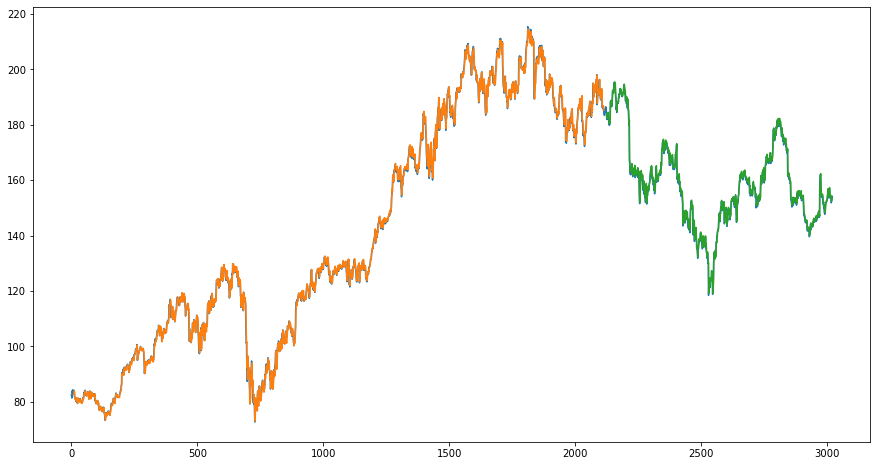

In [59]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_back:len(trainPredict_inv)+step_back, :] = trainPredict_inv
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict_inv)+step_back+step_back:, :] = testPredict_inv
# plot baseline and predictions
figure = plt.figure(figsize=(15,8))
plt.plot(minmax.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()